In [1]:
%load_ext autoreload
%load_ext autotime

time: 308 µs (started: 2024-03-27 18:18:56 -07:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')

time: 740 µs (started: 2024-03-27 18:18:56 -07:00)


In [3]:
trace_path = '/usr/workspace/iopp/wisio_logs/recorder_montage_pegasus_32/_parquet'

time: 572 µs (started: 2024-03-27 18:18:57 -07:00)


In [4]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio_recorder_montage_pegasus_32'

analyzer = RecorderAnalyzer(
    checkpoint=False,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/recorder_montage_pegasus_32',
    cluster_config=cluster_config,
    working_dir='.wisio/recorder_montage_pegasus_32',
    debug=True,
)

analyzer.cluster_manager.client.dashboard_link

ModuleNotFoundError: No module named 'sklearn'

time: 22.9 s (started: 2024-03-27 18:18:59 -07:00)


In [5]:
%autoreload 2

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['iops'],
    # slope_threshold=60,
    # view_types=['proc_name'],
)

[INFO] [20:48:40] Read traces (0.4721259919460863) [/g/g91/izzet/projects/wisio/wisio/recorder.py:78]
[INFO] [20:48:48] Compute high-level metrics (7.535261759068817) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:150]
[INFO] [20:48:50] Compute main view (2.069050627062097) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:165]
[INFO] [20:48:50] Compute metric boundaries (0.11370122502557933) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:182]
[INFO] [20:48:56] Compute perspectives (6.342497357167304) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:203]
[INFO] [20:48:58] Detect I/O bottlenecks (1.2883119089528918) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:213]
/g/g91/izzet/projects/wisio/wisio/rule_engine.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  if not behavior_key in bottlenecks.index:
/g/g91/izzet/projects/wisio/wisio/rule_engine.py:67: PerformanceWarning: indexing past lexsort depth may impact performance.
  bottlenecks.loc[behavior_key, COL_

time: 30.8 s (started: 2024-03-24 20:48:40 -07:00)


In [5]:
%autoreload 2

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['iops'],
    # slope_threshold=60,
    # view_types=['proc_name'],
)

[INFO] [10:20:26] Read traces (0.3532787309959531) [/g/g91/izzet/projects/wisio/wisio/recorder.py:78]
[INFO] [10:20:31] Compute high-level metrics (5.182617066078819) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:150]
[INFO] [10:20:33] Compute main view (1.4741815290180966) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:165]
[INFO] [10:20:33] Compute metric boundaries (0.09542824106756598) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:182]
[INFO] [10:20:38] Compute perspectives (5.1954356980277225) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:203]
[INFO] [10:20:39] Detect I/O bottlenecks (0.7360754950204864) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:213]
[INFO] [10:20:46] Attach reasons to I/O bottlenecks (7.546051283017732) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:228]
[DEBUG] [10:20:47] Save I/O bottlenecks (0.7492008319823071) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:231]


time: 21.4 s (started: 2024-03-05 10:20:26 -08:00)


In [6]:
result.output.console(compact=True, max_bottlenecks=2, root_only=True, show_debug=False)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│                                                                                                                 │
│  Runtime          433.15 s                                                                                      │
│  I/O Time         3.74 s - R: 83.17% - W: 16.56% - M: 6.70%                                                     │
│  I/O Operations   12.3M ops - R: 54.14% - W: 44.18% - M: 1.68%                                                  │
│  I/O Size         153.26 GiB - R: 74.85% - W: 25.15%                                                            │
│  Read Requests    4 kiB-64 kiB                                                                                  │
│  Write Requests   4 kiB-64 MiB                                                                                  │
│  Nodes            32 nodes                                                                                      │
│  Apps             10 apps                                                                                       │
│  Processes/Ranks  11,488 processes                                                                              │
│  Files            19,680 files - Shared: 32.55% - FPP: 67.45%                                                   │
│  Time Periods     84 time periods                                                                               │
│  Access Pattern   Sequential: 100.00% - Random: 0.00%                                                           │
│                                                                                                                 │
╰─ R: Read - W: Write - M: Metadata  ─────────────────────────────────────────────────────────────────────────────╯
                                                                                                                   
╭───────────────────────────────────── 495 I/O Bottlenecks with 1735 Reasons ─────────────────────────────────────╮
│                                                                                                                 │
│  File View (290 bottlenecks with 1028 reasons)                                                                  │
│  ├── [CR1] 1 process accesses 1 file (2-fit.000024.000060.txt) within 1 time period across 1 I/O operation and  │
│  │   has an I/O time of 0.17 seconds which is 4.42% of overall I/O time of the workload.                        │
│  │   └── [Excessive metadata access] Overall 100.00% (0.17 seconds) of I/O time is spent on metadata access,    │
│  │       specifically 100.00% (0.17 seconds) on the 'open' operation.                                           │
│  ├── [CR2] 3 processes access 3 files within 3 time periods across 1 I/O operation and have an I/O time of      │
│  │   0.15 seconds which is 4.11% of overall I/O time of the workload.                                           │
│  │   └── [Excessive metadata access] Overall 100.00% (0.15 seconds) of I/O time is spent on metadata access,    │
│  │       specifically 100.00% (0.15 seconds) on the 'open' operation.                                           │
│  └── (288 more)                                                                                                 │
│  Process View (159 bottlenecks with 540 reasons)                                                                │
│  ├── [CR291] 1 process (mDiffFit#lassen199#6878#35184372410352) accesses 4 files within 1 time period across 5  │
│  │   I/O operations and has an I/O time of 0.20 seconds which is 5.28% of overall I/O time of the workload.     │
│  │   └── [Excessive metadata access] Overall 100.00% (0.20 seconds) of I/O time is spent on metadata access,    │
│  │       specifically 99.99% (0.20 seconds) on the 'open' operation.                                            │
│  ├── [CR292] 3 processes access 12 files within 3 time

time: 3.57 s (started: 2024-03-24 20:49:27 -07:00)


In [14]:
result.output.console(compact=True, max_bottlenecks=2, root_only=True, show_debug=False)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│                                                                                                                 │
│  Job Time         433.15 seconds                                                                                │
│  I/O Time         3.74 s - R: 3.11 s (83.17%) - W: 0.62 s (16.56%) - M: 0.25 s (6.70%)                          │
│  I/O Ops          12,346,353 ops - R: 6,683,714 ops (54.14%) - W: 5,454,853 ops (44.18%) - M: 207,786 ops       │
│                   (1.68%)                                                                                       │
│  I/O Size         153.26 GiB - R: 114.71 GiB (74.85%) - W: 38.55 GiB (25.15%)                                   │
│  Read Xfer        4 kiB-64 kiB - 31,696 ops                                                                     │
│  Write Xfer       4 kiB-64 MiB - 1,759 ops                                                                      │
│  Nodes            32 nodes                                                                                      │
│  Apps             10 apps                                                                                       │
│  Processes/Ranks  11488 processes                                                                               │
│  Files            19680 files - Shared: 6405 files (32.55%) - FPP: 13275 files (67.45%)                         │
│  Time Periods     84 time periods                                                                               │
│  Access Pattern   Sequential: 12,138,567 ops (100.00%) - Random: 0 ops (0.00%)                                  │
│                                                                                                                 │
╰─ R: Read - W: Write - M: Metadata  ─────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│                                                                                                                 │
│  File view (18214 bottlenecks with 19353 reasons)                                                               │
│  ├── [CR1] 1 process accesses 1 file (2-fit.000024.000060.txt) within 1 time period across 1 I/O operation and  │
│  │   has an I/O time of 0.17 seconds which is 4.42% of overall I/O time of the workload.                        │
│  │   └── [Excessive metadata access] Overall 100.00% (0.17 seconds) of I/O time is spent on metadata access,    │
│  │       specifically 100.00% (0.17 seconds) on the 'open' operation.                                           │
│  ├── [CR2] 1 process accesses 1 file (1-fit.000059.000063.txt) within 1 time period across 1 I/O operation and  │
│  │   has an I/O time of 0.15 seconds which is 4.14% of overall I/O time of the workload.                        │
│  │   └── [Excessive metadata access] Overall 100.00% (0.15 seconds) of I/O time is spent on metadata access,    │
│  │       specifically 100.00% (0.15 seconds) on the 'open' operation.                                           │
│  ├── [CR3] 1 process accesses 1 file (1-fit.000061.000063.txt) within 1 time period across 1 I/O operation and  │
│  │   has an I/O time of 0.15 seconds which is 4.09% of overall I/O time of the workload.                        │
│  │   └── [Excessive metadata access] Overall 100.00% (0.15 seconds) of I/O time is spent on metadata access,    │
│  │       specifically 100.00% (0.15 seconds) on the 'open' operation.                                           │
│  ├── [CR4] 1 process accesses 1 file (1-fit.000058.000063.txt) within 1 time period across 1 I/O operation and  │
│  │   has an I/O time of 0.15 seconds which is 4.09% of overall I/O time of the workload.                        │
│  │   └── [Excessive metadata access] Overall 100.00% (

time: 1.92 s (started: 2024-03-05 11:10:59 -08:00)


In [7]:
import dask.dataframe as dd 

bot_ddf = dd.read_parquet(result.bottleneck_dir)
bot_ddf

,subject,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,metadata_size,read_count,write_count,metadata_count,read_min,read_max,write_min,write_max,metadata_min,metadata_max,data_count,data_size,data_time,sequential_time,random_time,sequential_size,random_size,sequential_count,random_count,close_time,open_time,seek_time,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope,iops_bin,iops_score,time_overall,num_proc_name,num_time_range,num_file_name,metric,view_depth,view_name,excessive_metadata_access,excessive_metadata_access.reason.0,excessive_metadata_access.reason.1,excessive_metadata_access.reason.2,operation_imbalance,operation_imbalance.reason.0,operation_imbalance.reason.1,random_operations,random_operations.reason.0,size_imbalance,size_imbalance.reason.0,size_imbalance.reason.1,small_reads,small_reads.reason.0,small_reads.reason.1,small_writes,small_writes.reason.0,small_writes.reason.1
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,string,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,int64,string,float64,float64,float64,float64,string,int64,string,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


time: 93.3 ms (started: 2024-03-05 10:49:15 -08:00)


In [8]:
import numpy as np

bot_df = bot_ddf.reset_index(drop=True).compute()
bot_df['id'] = np.arange(len(bot_df)) + 1
bot_df

,subject,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,...,size_imbalance,size_imbalance.reason.0,size_imbalance.reason.1,small_reads,small_reads.reason.0,small_reads.reason.1,small_writes,small_writes.reason.0,small_writes.reason.1,id
0,2-fit.000024.000060.txt,0.165419,1,0,0,0,0.0,0.0,0.165419,0,...,False,False,False,False,False,True,False,False,True,1
1,1-fit.000059.000063.txt,0.154675,1,0,0,0,0.0,0.0,0.154675,0,...,False,False,False,False,False,True,False,False,True,2
2,1-fit.000061.000063.txt,0.153100,1,0,0,0,0.0,0.0,0.153100,0,...,False,False,False,False,False,True,False,False,True,3
3,1-fit.000058.000063.txt,0.152882,1,0,0,0,0.0,0.0,0.152882,0,...,False,False,False,False,False,True,False,False,True,4
4,2-fit.000032.000053.txt,0.144454,1,0,0,0,0.0,0.0,0.144454,0,...,False,False,False,False,False,True,False,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69641,/p/gpfs1/haridev/iopp/montage-workflow/scratch...,0.000130,3,0,0,0,0.0,0.0,0.000130,0,...,False,False,False,False,False,True,False,False,True,69642
69642,/p/gpfs1/haridev/iopp/montage-workflow/scratch...,0.000130,3,0,0,0,0.0,0.0,0.000130,0,...,False,False,False,False,False,True,False,False,True,69643
69643,/p/gpfs1/haridev/iopp/montage-workflow/scratch...,0.000130,3,0,0,0,0.0,0.0,0.000130,0,...,False,False,False,False,False,True,False,False,True,69644
69644,/p/gpfs1/haridev/iopp/montage-workflow/scratch...,0.000130,3,0,0,0,0.0,0.0,0.000130,0,...,False,False,False,False,False,True,False,False,True,69645


time: 241 ms (started: 2024-03-05 10:49:24 -08:00)


In [9]:
results = bot_df[(bot_df['view_name'] == 'file_name')]
results

,subject,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,...,size_imbalance,size_imbalance.reason.0,size_imbalance.reason.1,small_reads,small_reads.reason.0,small_reads.reason.1,small_writes,small_writes.reason.0,small_writes.reason.1,id
0,2-fit.000024.000060.txt,0.165419,1,0,0,0,0.000000,0.000000,0.165419,0,...,False,False,False,False,False,True,False,False,True,1
1,1-fit.000059.000063.txt,0.154675,1,0,0,0,0.000000,0.000000,0.154675,0,...,False,False,False,False,False,True,False,False,True,2
2,1-fit.000061.000063.txt,0.153100,1,0,0,0,0.000000,0.000000,0.153100,0,...,False,False,False,False,False,True,False,False,True,3
3,1-fit.000058.000063.txt,0.152882,1,0,0,0,0.000000,0.000000,0.152882,0,...,False,False,False,False,False,True,False,False,True,4
4,2-fit.000032.000053.txt,0.144454,1,0,0,0,0.000000,0.000000,0.144454,0,...,False,False,False,False,False,True,False,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18209,/p/gpfs1/haridev/iopp/montage-workflow/scratch...,0.017073,2395,0,20352,31676738,0.016965,0.013596,0.000129,15839618,...,False,True,False,True,True,True,True,True,True,18210
18210,/p/gpfs1/haridev/iopp/montage-workflow/scratch...,0.048602,6821,2,20616,86782684,0.031820,0.048422,0.000199,33712924,...,True,False,True,True,True,True,True,True,True,18211
18211,/p/gpfs1/haridev/iopp/montage-workflow/scratch...,0.031892,4491,2,20488,56992324,0.027181,0.025156,0.007627,28572484,...,False,True,False,True,True,True,True,True,True,18212
18212,/p/gpfs1/haridev/iopp/montage-workflow/scratch...,0.048332,6809,2,20648,87037578,0.036535,0.048240,0.000145,33803658,...,True,False,True,True,True,True,True,True,True,18213


time: 24.9 ms (started: 2024-03-05 10:49:35 -08:00)


In [12]:
sum(len(results[results[rule] == True]) for rule in result.bottleneck_rules)

19353

time: 11.6 ms (started: 2024-03-05 11:05:28 -08:00)


In [51]:
result.output.console()

[DEBUG] [18:53:49] open file: /g/g91/izzet/projects/wisio/notebooks/.wisio/recorder_montage_pegasus_32/1707186031/bottlenecks/00.json [/g/g91/izzet/projects/wisio/venv-corona/lib/python3.9/site-packages/fsspec/implementations/local.py:294]


╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             433.15 seconds                                                                            │
│  I/O Time             3.74 seconds                                                                              │
│                       ├── Read - 3.11 seconds (83.17%)                                                          │
│                       ├── Write - 0.62 seconds (16.56%)                                                         │
│                       └── Metadata - 0.25 seconds (6.70%)                                                       │
│  I/O Ops              12,346,353 ops                                                                            │
│                       ├── Read - 6,683,714 ops (54.14%)                                                         │
│                       ├── Write - 5,454,853 ops (44.18%)                                                        │
│                       └── Metadata - 207,786 ops (1.68%)                                                        │
│  I/O Size             153.26 GiB                                                                                │
│                       ├── Read - 114.71 GiB (74.85%)                                                            │
│                       └── Write - 38.55 GiB (25.15%)                                                            │
│  Read Xfer            4 kiB-64 kiB - 31,696 ops                                                                 │
│                       ├── <4 kiB - 27,173 ops (85.73%)                                                          │
│                       ├── 4-16 kiB - 239 ops (0.75%)                                                            │
│                       └── 16-64 kiB - 4,284 ops (13.52%)                                                        │
│  Write Xfer           4 kiB-64 MiB - 1,759 ops                                                                  │
│                       ├── <4 kiB - 726 ops (41.27%)                                                             │
│                       ├── 4-16 kiB - 116 ops (6.59%)                                                            │
│                       ├── 16-64 kiB - 915 ops (52.02%)                                                          │
│                       └── 16-64 MiB - 2 ops (0.11%)                                                             │
│  Node(s)              32 node(s)                                                                                │
│                       ├── lassen734 - 3.74 s (100.00%) - 6.91 GiB/1.25 GiB R/W (4.51/0.81%) - 569,078 ops       │
│                       │   (4.61%)                                                                               │
│                       ├── lassen731 - 3.65 s (97.62%) - 6.46 GiB/1.27 GiB R/W (4.22/0.83%) - 572,777 ops        │
│                       │   (4.64%)                                                                               │
│                       ├── lassen677 - 3.63 s (97.03%) - 8.10 GiB/1.94 GiB R/W (5.28/1.26%) - 671,924 ops        │
│                       │   (5.44%)                                                                               │
│                       ├── lassen200 - 0.50 s (13.38%) - 5.61 GiB/505.57 MiB R/W (3.66/0.32%) - 394,314 ops      │
│                       │   (3.19%)                                                                               │
│                       ├── lassen528 - 0.40 s (10.71%) - 3.37 GiB/0.91 GiB R/W (2.20/0.59%) - 344,224 ops        │
│                       │   (2.79%)                                                                               │
│                       ├── lassen77 - 0.40 s (10.63%) - 3.72 GiB/3.88 GiB R/W (2.43/2.53%) - 657,508 ops         │
│                       │   (5.33%)                     

time: 8.74 s (started: 2024-02-05 18:53:49 -08:00)


In [7]:
result.output.bottleneck_dir

'.wisio/recorder_montage_pegasus_32/1707186031/bottlenecks'

time: 4.2 ms (started: 2024-02-05 18:26:34 -08:00)


In [36]:
import numpy as np
from dask.delayed import delayed
from wisio.types import view_name

view_results = result.view_results

perspective_count_tree = {}
perspective_critical_count_tree = {}
perspective_record_count_tree = {}
num_metrics = 0
perspectives = set()
root_view_type_counts = {}
for metric in view_results:
    perspective_count_tree[metric] = {}
    perspective_critical_count_tree[metric] = {}
    perspective_record_count_tree[metric] = {}
    root_view_type_counts[metric] = []
    num_metrics = num_metrics + 1
    for view_key, view_result in view_results[metric].items():
        count_key = view_name(view_key, '>')
        bot_important_count = view_result.view.reduction(len, np.sum)
        view_critical_count = view_result.critical_view.reduction(len, np.sum)
        view_record_count = view_result.records.reduction(len, np.sum)
        perspective_count_tree[metric][count_key] = bot_important_count
        perspective_critical_count_tree[metric][count_key] = view_critical_count
        perspective_record_count_tree[metric][count_key] = view_record_count
        perspectives.add(view_key)
        if len(view_key) == 1:
            root_view_type_counts[metric].append(view_critical_count)
num_metrics = num_metrics
num_perspectives = len(perspectives)

time: 387 ms (started: 2024-02-05 18:40:14 -08:00)


In [13]:
view_result.view.co

301840

time: 230 ms (started: 2024-02-05 18:31:07 -08:00)


In [30]:
int(view_result.view.map_partitions(len).compute())

7546

time: 211 ms (started: 2024-02-05 18:35:33 -08:00)


In [35]:
import dask 
import numpy as np

dask.compute(view_result.view.reduction(len, np.sum))

(7546,)

time: 228 ms (started: 2024-02-05 18:38:43 -08:00)


In [40]:
perspective_count_tree, perspective_critical_count_tree, perspective_record_count_tree, = dask.compute(perspective_count_tree, perspective_critical_count_tree, perspective_record_count_tree)
perspective_count_tree

{'iops': {'file_name': 19680,
  'proc_name': 11488,
  'time_range': 84,
  'file_name>proc_name': 7171,
  'file_name>time_range': 80,
  'proc_name>file_name': 17279,
  'proc_name>time_range': 56,
  'time_range>file_name': 8429,
  'time_range>proc_name': 4328,
  'file_name>proc_name>time_range': 62,
  'file_name>time_range>proc_name': 3985,
  'proc_name>file_name>time_range': 51,
  'proc_name>time_range>file_name': 7424,
  'time_range>file_name>proc_name': 3799,
  'time_range>proc_name>file_name': 7546}}

time: 1.23 s (started: 2024-02-05 18:41:47 -08:00)


In [45]:
from scipy.stats import skew

avg_perspective_count = {}
avg_perspective_count_std = {}
avg_perspective_critical_count = {}
avg_perspective_critical_count_std = {}
per_records_discarded = {}
per_records_retained = {}
perspective_skewness = {}
root_perspective_skewness = {}
for metric in perspective_count_tree:
    perspective_counts = [perspective_count_tree[metric][count_key]
                            for count_key in perspective_count_tree[metric]]
    perspective_avg = np.average(perspective_counts)
    perspective_std = np.std(perspective_counts)

    perspective_critical_counts = [perspective_critical_count_tree[metric][count_key]
                                    for count_key in perspective_critical_count_tree[metric]]
    perspective_critical_avg = np.average(perspective_critical_counts)
    perspective_critical_std = np.std(perspective_critical_counts)

    avg_perspective_count[metric] = perspective_avg
    avg_perspective_count_std[metric] = perspective_std
    avg_perspective_critical_count[metric] = perspective_critical_avg
    avg_perspective_critical_count_std[metric] = perspective_critical_std

    # perspective_critical_per = perspective_critical_avg/raw_count
    # per_records_discarded[metric] = 1-perspective_critical_per
    # per_records_retained[metric] = perspective_critical_per

    perspective_skewness[metric] = abs(skew(perspective_counts))
    root_perspective_skewness[metric] = abs(skew(root_view_type_counts[metric]))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Scalar'

time: 226 ms (started: 2024-02-05 18:45:36 -08:00)


In [46]:
root_view_type_counts[metric]

[dd.Scalar<_reduct..., dtype=int64>,
 dd.Scalar<_reduct..., dtype=int64>,
 dd.Scalar<_reduct..., dtype=int64>]

time: 5.01 ms (started: 2024-02-05 18:45:47 -08:00)


In [11]:
perspective_record_count_tree

{'iops': {'file_name': 25846,
  'proc_name': 47038,
  'time_range': 18205,
  'file_name>proc_name': 23039,
  'file_name>time_range': 11555,
  'proc_name>file_name': 13458,
  'proc_name>time_range': 13204,
  'time_range>file_name': 9667,
  'time_range>proc_name': 13724,
  'file_name>proc_name>time_range': 8210,
  'file_name>time_range>proc_name': 9363,
  'proc_name>file_name>time_range': 4858,
  'proc_name>time_range>file_name': 5556,
  'time_range>file_name>proc_name': 6853,
  'time_range>proc_name>file_name': 6011}}

time: 4.77 ms (started: 2024-02-05 18:27:55 -08:00)


In [35]:
import dask.bag as db
import dataclasses
import itertools as it
import json
from dask import compute, delayed, visualize
from typing import Dict, List, Tuple, Union

from pandas.core.api import DataFrame as DataFrame, Index as Index, Series as Series
from wisio.rules import *
from wisio.types import Metric, RuleResult, ViewKey, view_name
from wisio.utils.collection_utils import deepflatten


def _define_bottleneck_tasks(
    zipped: Tuple[str, str, ViewKey, ScoringResult],
    rules: Dict[str, BottleneckRule],
    characteristics: Dict[str, RuleResult],
    metric_boundaries: Dict[Metric, dd.core.Scalar],
):
    rule, metric, view_key, scoring_result = zipped
    rule_impl = rules[rule]
    return rule, metric, view_key, rule_impl.define_tasks(
        metric,
        metric_boundary=metric_boundaries[metric],
        view_key=view_key,
        scoring_result=scoring_result,
        characteristics=characteristics,
    )


def _handle_bottleneck_task_results(
    zipped: Tuple[str, str, ViewKey, tuple],
    rules: Dict[str, BottleneckRule],
    characteristics: Dict[str, RuleResult],
):
    # print(zipped)
    rule, metric, view_key, result = zipped
    rule_impl = rules[rule]
    # bottleneck = {}
    # bottleneck[rule] = {}
    # bottleneck[rule][metric] = {}
    # bottleneck[rule][metric][view_name(view_key)] = rule_impl.handle_task_results(
    #     metric=metric,
    #     view_key=view_key,
    #     result=result,
    #     characteristics=characteristics,
    # )
    bottlenecks = rule_impl.handle_task_results(
        metric=metric,
        view_key=view_key,
        result=result,
        characteristics=characteristics,
    )
    # bottleneck_list = dataclasses.asdict(bottleneck)
    # bottleneck_dict['rule'] = rule
    # bottleneck_dict['metric'] = rule
    # bottleneck_dict['view_name'] = view_name(view_key)
    # bottleneck[rule][metric][view_key] = {}

    def convert_to_bottleneck(x):
        bottleneck = dataclasses.asdict(x)
        bottleneck['metric'] = metric
        bottleneck['rule'] = rule
        bottleneck['view_name'] = view_name(view_key)
        return bottleneck
    return map(convert_to_bottleneck, bottlenecks)


class BottleneckRule2(BottleneckRule):

    def handle_task_results(
        self,
        metric: Metric,
        view_key: ViewKey,
        result: Dict[str, Union[str, int, pd.DataFrame, pd.Series, pd.Index]],
        characteristics: Dict[str, RuleResult] = None,
    ) -> List[RuleResult]:
        t0 = time.perf_counter()

        view_type = view_key[-1]

        bottlenecks = result['bottlenecks']

        if len(bottlenecks) == 0:
            return {}

        details = result['details'].to_frame(index=False)
        metric_boundary = result['metric_boundary']

        num_files = {}
        num_ops = bottlenecks[COL_COUNT].to_dict()
        num_processes = {}
        num_time_periods = {}

        for col in details.columns:
            if col in [COL_FILE_NAME, COL_FILE_DIR, COL_FILE_PATTERN]:
                num_files = details.groupby(view_type)[col].nunique().to_dict()
            if col in [COL_APP_NAME, COL_NODE_NAME, COL_PROC_NAME, COL_RANK]:
                num_processes = details.groupby(view_type)[col].nunique().to_dict()
            if col == COL_TIME_RANGE:
                num_time_periods = details.groupby(view_type)[col].nunique().to_dict()

        # print('handle_task_results t1', time.perf_counter() - t0)

        reasoning = {}
        reasoning_templates = {}
        for i, reason in enumerate(self.rule.reasons):
            reasoning[i] = result[f"reason{i}"].to_dict()
            reasoning_templates[i] = jinja_env.from_string(reason.message)

        # print('handle_task_results t2', time.perf_counter() - t0)

        results = []

        def convert_to_result(row):
            row_num_files = num_files.get(row.Index, 0)
            row_num_ops = num_ops.get(row.Index, 0)
            row_num_processes = num_processes.get(row.Index, 0)
            row_num_time_periods = num_time_periods.get(row.Index, 0)

            description = self._describe_bottleneck(
                ix=row.Index,
                metric=metric,
                metric_boundary=metric_boundary,
                num_files=row_num_files,
                num_ops=row_num_ops,
                num_processes=row_num_processes,
                num_time_periods=row_num_time_periods,
                row=row,
                view_type=view_type,
            )

            row_dict = row._asdict()
            row_dict['num_files'] = row_num_files
            row_dict['num_ops'] = row_num_ops
            row_dict['num_processes'] = row_num_processes
            row_dict['num_time_periods'] = row_num_time_periods

            reasons = []
            for i, reason in enumerate(self.rule.reasons):
                if reasoning[i][row.Index]:
                    reasons.append(RuleResultReason(
                        description=reasoning_templates[i].render(row_dict).strip()
                    ))

            result = RuleResult(
                description=description,
                detail_list=None,
                extra_data=row_dict,
                id=hash('_'.join([
                    '{:,.6f}'.format(row_dict['time']),
                    f"{row_dict['num_files']}",
                    f"{row_dict['num_processes']}",
                    f"{row_dict['num_time_periods']}",
                ])),
                reasons=reasons,
                value=0,
                value_fmt='',
            )
            return result

        # results, = compute([convert_to_result(row) for row in bottlenecks.itertuples()])

        for row in bottlenecks.itertuples():

            row_num_files = num_files.get(row.Index, 0)
            row_num_ops = num_ops.get(row.Index, 0)
            row_num_processes = num_processes.get(row.Index, 0)
            row_num_time_periods = num_time_periods.get(row.Index, 0)

            description = self._describe_bottleneck(
                ix=row.Index,
                metric=metric,
                metric_boundary=metric_boundary,
                num_files=row_num_files,
                num_ops=row_num_ops,
                num_processes=row_num_processes,
                num_time_periods=row_num_time_periods,
                row=row,
                view_type=view_type,
            )

            row_dict = row._asdict()
            row_dict['num_files'] = row_num_files
            row_dict['num_ops'] = row_num_ops
            row_dict['num_processes'] = row_num_processes
            row_dict['num_time_periods'] = row_num_time_periods

            reasons = []
            for i, reason in enumerate(self.rule.reasons):
                if reasoning[i][row.Index]:
                    reasons.append(RuleResultReason(
                        description=reasoning_templates[i].render(row_dict).strip()
                    ))

            result = RuleResult(
                description=description,
                detail_list=None,
                extra_data=row_dict,
                id=hash('_'.join([
                    '{:,.6f}'.format(row_dict['time']),
                    f"{row_dict['num_files']}",
                    f"{row_dict['num_processes']}",
                    f"{row_dict['num_time_periods']}",
                ])),
                reasons=reasons,
                value=0,
                value_fmt='',
            )

            results.append(result)

        print('handle_task_results tt3', time.perf_counter() - t0, len(results))

        return results


rule_dict = {rule: BottleneckRule2(rule_key=rule, rule=KNOWN_RULES[rule], verbose=False)
             for rule in KNOWN_RULES}

metrics = list(evaluated_views.keys())

view_keys_per_metric = list(it.chain.from_iterable(
    evaluated_views[metric].keys() for metric in metrics))
evaluated_views_per_metric = list(it.chain.from_iterable(
    evaluated_views[metric].values() for metric in metrics))

rules_bag = db.from_sequence(
    np.repeat(list(rule_dict.keys()), len(view_keys_per_metric)))
metrics_bag = db.from_sequence(
    np.repeat(metrics, len(rule_dict) * len(view_keys_per_metric)))
view_keys_bag = db.from_sequence(
    list(it.chain.from_iterable(it.repeat(view_keys_per_metric, len(rule_dict)))))
evaluated_views_bag = db.from_sequence(
    list(it.chain.from_iterable(it.repeat(evaluated_views_per_metric, len(rule_dict)))))

# tasks = db.zip(rules_bag, metrics_bag, view_keys_bag, evaluated_views_bag) \
#     .map(_define_bottleneck_tasks,
#             rules=rule_dict,
#             characteristics=characteristics,
#             metric_boundaries=metric_boundaries) \
#     .map(compute, optimize_graph=True) \
#     .flatten() \
#     .compute()

tasks = db.zip(rules_bag, metrics_bag, view_keys_bag, evaluated_views_bag) \
    .map(_define_bottleneck_tasks,
         rules=rule_dict,
         characteristics={},
         metric_boundaries=metric_boundaries) \
    .map(compute) \
    .flatten() \
    .map(_handle_bottleneck_task_results, rules=rule_dict, characteristics={}) \
    .flatten() \
    .compute()
    # .persist() \
    # .repartition(partition_size='16MB') \
    # .map(json.dumps).to_textfiles("tmp/*.json")

handle_task_results tt3 0.2987013179808855 280
handle_task_results tt3 0.046527552884072065 32
handle_task_results tt3 0.08312793378718197 58
handle_task_results tt3 0.013294902862980962 1
handle_task_results tt3 0.21518441778607666 138
handle_task_results tt3 0.20681140990927815 250
handle_task_results tt3 0.23847072501666844 268
handle_task_results tt3 0.11918497714214027 138
handle_task_results tt3 0.045168092008680105 2
handle_task_results tt3 0.05028059100732207 1
handle_task_results tt3 0.08013114798814058 2
handle_task_results tt3 0.015506366966292262 1
handle_task_results tt3 0.24660729989409447 223
handle_task_results tt3 0.28425311599858105 268
handle_task_results tt3 0.33901773602701724 417
handle_task_results tt3 0.05938993999734521 57
handle_task_results tt3 0.06576812802813947 27
handle_task_results tt3 0.34106887714006007 250
handle_task_results tt3 0.46549544390290976 571
handle_task_results tt3 2.824843534035608 3904
handle_task_results tt3 2.8045489829964936 3570
hand

In [8]:
import awkward as ak
import dask_awkward as dak 
import dataclasses

bot_arr = dak.from_json('tmp/*.json')
bot_arr

dask.awkward<from-json-files, npartitions=60>

time: 23.5 ms (started: 2024-02-04 12:45:25 -08:00)


In [9]:
bot_det_arr = dak.flatten(dak.zip({
    'rule': bot_arr['rule'],
    'metric': bot_arr['metric'],
    'view_name': bot_arr['view_name'],
    'description': bot_arr['description'],
    'reasons': bot_arr['reasons'],
    'num_files': bot_arr['extra_data']['num_files'],
    'num_ops': bot_arr['extra_data']['num_ops'],
    'num_processes': bot_arr['extra_data']['num_processes'],
    'num_time_periods': bot_arr['extra_data']['num_time_periods'],
}))

bot_det_arr

dask.awkward<flatten, npartitions=60>

time: 19.5 ms (started: 2024-02-04 12:45:26 -08:00)


In [10]:
bot_det_arr_c = bot_det_arr.compute()
bot_det_arr_c

<Array [{rule: ..., ...}, {...}, ..., {...}] type='90322 * {rule: string, m...'>

time: 545 ms (started: 2024-02-04 12:45:27 -08:00)


In [8]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             433.15 seconds                                                                            │
│  I/O Time             3.74 seconds                                                                              │
│                       ├── Read - 3.11 seconds (83.17%)                                                          │
│                       ├── Write - 0.62 seconds (16.56%)                                                         │
│                       └── Metadata - 0.25 seconds (6.70%)                                                       │
│  I/O Ops              12,346,353 ops                                                                            │
│                       ├── Read - 6,683,714 ops (54.14%)                                                         │
│                       ├── Write - 5,454,853 ops (44.18%)                                                        │
│                       └── Metadata - 207,786 ops (1.68%)                                                        │
│  I/O Size             153.26 GiB                                                                                │
│                       ├── Read - 114.71 GiB (74.85%)                                                            │
│                       └── Write - 38.55 GiB (25.15%)                                                            │
│  Read Xfer            4 kiB-64 kiB - 6,144 ops                                                                  │
│                       ├── <4 kiB - 5,287 ops (86.05%)                                                           │
│                       ├── 4-16 kiB - 36 ops (0.59%)                                                             │
│                       └── 16-64 kiB - 821 ops (13.36%)                                                          │
│  Write Xfer           4 kiB-64 MiB - 770 ops                                                                    │
│                       ├── <4 kiB - 333 ops (43.25%)                                                             │
│                       ├── 4-16 kiB - 55 ops (7.14%)                                                             │
│                       ├── 16-64 kiB - 380 ops (49.35%)                                                          │
│                       └── 16-64 MiB - 2 ops (0.26%)                                                             │
│  Node(s)              32 node(s)                                                                                │
│                       ├── lassen734 - 3.74 s (100.00%) - 6.91 GiB/1.25 GiB R/W (4.51/0.81%) - 569,078 ops       │
│                       │   (4.61%)                                                                               │
│                       ├── lassen731 - 3.65 s (97.62%) - 6.46 GiB/1.27 GiB R/W (4.22/0.83%) - 572,777 ops        │
│                       │   (4.64%)                                                                               │
│                       ├── lassen677 - 3.63 s (97.03%) - 8.10 GiB/1.94 GiB R/W (5.28/1.26%) - 671,924 ops        │
│                       │   (5.44%)                                                                               │
│                       ├── lassen200 - 0.50 s (13.38%) - 5.61 GiB/505.57 MiB R/W (3.66/0.32%) - 394,314 ops      │
│                       │   (3.19%)                                                                               │
│                       ├── lassen528 - 0.40 s (10.71%) - 3.37 GiB/0.91 GiB R/W (2.20/0.59%) - 344,224 ops        │
│                       │   (2.79%)                                                                               │
│                       ├── lassen77 - 0.40 s (10.63%) - 3.72 GiB/3.88 GiB R/W (2.43/2.53%) - 657,508 ops         │
│                       │   (5.33%)                     

time: 356 ms (started: 2024-01-28 16:18:58 -08:00)


In [6]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             433.15 seconds                                                                            │
│  I/O Time             3.74 seconds                                                                              │
│                       ├── Read - 3.11 seconds (83.17%)                                                          │
│                       ├── Write - 0.62 seconds (16.56%)                                                         │
│                       └── Metadata - 0.25 seconds (6.70%)                                                       │
│  I/O Ops              12,346,353 ops                                                                            │
│                       ├── Read - 6,683,714 ops (54.14%)                                                         │
│                       ├── Write - 5,454,853 ops (44.18%)                                                        │
│                       └── Metadata - 207,786 ops (1.68%)                                                        │
│  I/O Size             153.26 GiB                                                                                │
│                       ├── Read - 114.71 GiB (74.85%)                                                            │
│                       └── Write - 38.55 GiB (25.15%)                                                            │
│  Read Xfer            4 kiB-64 kiB - 6,144 ops                                                                  │
│                       ├── <4 kiB - 5,287 ops (86.05%)                                                           │
│                       ├── 4-16 kiB - 36 ops (0.59%)                                                             │
│                       └── 16-64 kiB - 821 ops (13.36%)                                                          │
│  Write Xfer           4 kiB-64 MiB - 770 ops                                                                    │
│                       ├── <4 kiB - 333 ops (43.25%)                                                             │
│                       ├── 4-16 kiB - 55 ops (7.14%)                                                             │
│                       ├── 16-64 kiB - 380 ops (49.35%)                                                          │
│                       └── 16-64 MiB - 2 ops (0.26%)                                                             │
│  Node(s)              32 node(s)                                                                                │
│                       ├── lassen734 - 3.74 s (100.00%) - 6.91 GiB/1.25 GiB R/W (4.51/0.81%) - 569,078 ops       │
│                       │   (4.61%)                                                                               │
│                       ├── lassen731 - 3.65 s (97.62%) - 6.46 GiB/1.27 GiB R/W (4.22/0.83%) - 572,777 ops        │
│                       │   (4.64%)                                                                               │
│                       ├── lassen677 - 3.63 s (97.03%) - 8.10 GiB/1.94 GiB R/W (5.28/1.26%) - 671,924 ops        │
│                       │   (5.44%)                                                                               │
│                       ├── lassen200 - 0.50 s (13.38%) - 5.61 GiB/505.57 MiB R/W (3.66/0.32%) - 394,314 ops      │
│                       │   (3.19%)                                                                               │
│                       ├── lassen528 - 0.40 s (10.71%) - 3.37 GiB/0.91 GiB R/W (2.20/0.59%) - 344,224 ops        │
│                       │   (2.79%)                                                                               │
│                       ├── lassen77 - 0.40 s (10.63%) - 3.72 GiB/3.88 GiB R/W (2.43/2.53%) - 657,508 ops         │
│                       │   (5.33%)                     

time: 343 ms (started: 2024-01-28 16:18:21 -08:00)


In [7]:
result.output.csv(name='Montage_Pegasus', file_path='montage_pegasus.csv')

time: 560 ms (started: 2023-12-20 17:10:29 -08:00)


In [14]:
timings = analyzer.cluster_manager.client.get_events('timings')
timings

((1703148367.741741,
  {'key': 'time_proc_name_slope',
   'message': None,
   'partition': 0,
   'size': 62789,
   'time': 6624555.310665858,
   'type': 'start'}),
 (1703148367.7853022,
  {'key': 'time_file_name_slope',
   'message': None,
   'partition': 0,
   'size': 62789,
   'time': 6624555.360749958,
   'type': 'start'}),
 (1703148368.100303,
  {'key': 'time_proc_name_slope',
   'message': 'set_bound_columns end',
   'partition': 0,
   'size': 11488,
   'time': 6624555.674150212,
   'type': 'progress'}),
 (1703148368.1201127,
  {'key': 'time_time_range_slope',
   'message': None,
   'partition': 0,
   'size': 62789,
   'time': 6624555.679529141,
   'type': 'start'}),
 (1703148368.1273482,
  {'key': 'time_proc_name_slope',
   'message': 'set_metric_slope end',
   'partition': 0,
   'size': 11488,
   'time': 6624555.6998183,
   'type': 'end'}),
 (1703148369.8168437,
  {'key': 'time_proc_name_time_range_slope',
   'message': None,
   'partition': 0,
   'size': 47576,
   'time': 66245

time: 33.7 ms (started: 2023-12-21 00:46:52 -08:00)


In [16]:
import numpy as np

timings_dict = {}
for _, timing in timings:
    timing_key = timing['key']
    timings_dict[timing_key] = timings_dict.get(timing_key, {})
    timings_dict[timing_key]['input_size'] = timings_dict[timing_key].get(
        'input_size', 0)
    timings_dict[timing_key]['output_size'] = timings_dict[timing_key].get(
        'output_size', 0)
    timings_dict[timing_key]['start'] = timings_dict[timing_key].get(
        'start', np.inf)
    timings_dict[timing_key]['end'] = timings_dict[timing_key].get(
        'end', -np.inf)
    if timing['type'] == 'start':
        timings_dict[timing_key]['input_size'] = timings_dict[timing_key]['input_size'] + timing['size']
        timings_dict[timing_key]['start'] = min(
            timings_dict[timing_key]['start'], timing['time'])
    elif timing['type'] == 'end':
        timings_dict[timing_key]['output_size'] = timings_dict[timing_key]['output_size'] + timing['size']
        timings_dict[timing_key]['end'] = max(
            timings_dict[timing_key]['end'], timing['time'])
    else:
        # progress
        pass

for timing_key in timings_dict:
    timings_dict[timing_key]['elapsed'] = timings_dict[timing_key]['end'] - \
        timings_dict[timing_key]['start']

timings_dict

{'time_proc_name_slope': {'input_size': 125578,
  'output_size': 22976,
  'start': 6624555.310665858,
  'end': 6624565.489385538,
  'elapsed': 10.178719679825008},
 'time_file_name_slope': {'input_size': 125578,
  'output_size': 39360,
  'start': 6624555.360749958,
  'end': 6624567.223236447,
  'elapsed': 11.862486489117146},
 'time_time_range_slope': {'input_size': 125578,
  'output_size': 168,
  'start': 6624555.679529141,
  'end': 6624565.855592098,
  'elapsed': 10.176062957383692},
 'time_proc_name_time_range_slope': {'input_size': 95152,
  'output_size': 112,
  'start': 6624557.361268749,
  'end': 6624567.012861582,
  'elapsed': 9.65159283298999},
 'time_proc_name_file_name_slope': {'input_size': 95152,
  'output_size': 34646,
  'start': 6624557.361560835,
  'end': 6624567.485105792,
  'elapsed': 10.123544957488775},
 'time_time_range_file_name_slope': {'input_size': 36410,
  'output_size': 16858,
  'start': 6624559.219287405,
  'end': 6624566.80118963,
  'elapsed': 7.581902225501

time: 9.53 ms (started: 2023-12-21 00:47:08 -08:00)


In [18]:
import pandas as pd 

timings_df = pd.DataFrame.from_dict(timings_dict, orient='index')
timings_df

,input_size,output_size,start,end,elapsed
time_proc_name_slope,125578,22976,6.624555e+06,6.624565e+06,10.178720
time_file_name_slope,125578,39360,6.624555e+06,6.624567e+06,11.862486
time_time_range_slope,125578,168,6.624556e+06,6.624566e+06,10.176063
time_proc_name_time_range_slope,95152,112,6.624557e+06,6.624567e+06,9.651593
time_proc_name_file_name_slope,95152,34646,6.624557e+06,6.624567e+06,10.123545
time_time_range_file_name_slope,36410,16858,6.624559e+06,6.624567e+06,7.581902
time_time_range_proc_name_slope,36410,8656,6.624559e+06,6.624566e+06,6.834786
time_proc_name_time_range_file_name_slope,23642,14072,6.624559e+06,6.624568e+06,8.326955
time_proc_name_node_name_slope,125578,64,6.624560e+06,6.624570e+06,9.901797
time_proc_name_rank_slope,125578,22458,6.624560e+06,6.624570e+06,10.541526


time: 14.9 ms (started: 2023-12-21 00:47:22 -08:00)


In [19]:
timings_df.to_csv('timings_montage_pegasus.csv')

time: 4.05 ms (started: 2023-12-21 00:47:32 -08:00)


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x155505ea44f0>)

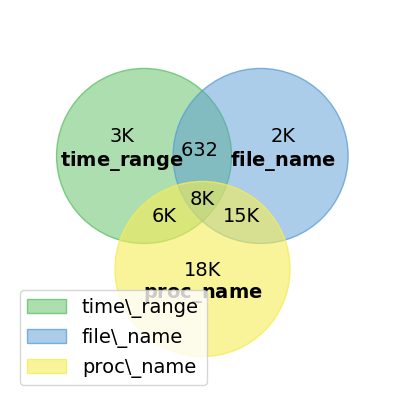

time: 588 ms (started: 2023-12-17 23:45:27 -08:00)


In [8]:
result.plots.view_relations3(
    metric='time',
    view_key1=('time_range',),
    view_key2=('file_name',),
    view_key3=('proc_name',),
)

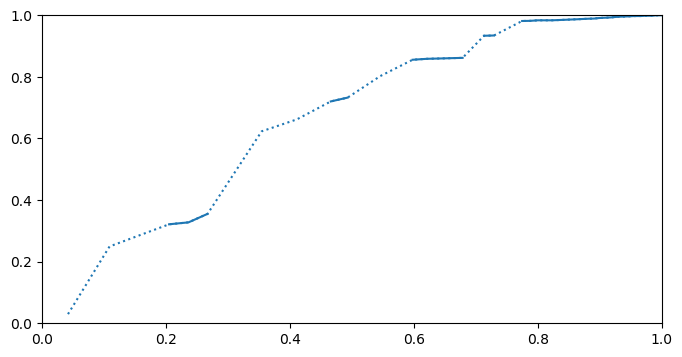

time: 402 ms (started: 2023-12-17 23:45:29 -08:00)


In [9]:
fig, ax = result.plots.slope(
    figsize=(8, 4),
    metric='time',
    view_keys=[('time_range',)],
)